In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import os

In [4]:
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

In [6]:
print("Current Working Directory:",os.getcwd())

Current Working Directory: c:\Users\shash\Downloads\deep learning\Potato Leaf Disease Detection


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [9]:
lables= training_set.class_names

In [11]:
print(lables)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [28]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [29]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
cnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 892ms/step - accuracy: 0.3971 - loss: 1.3742 - val_accuracy: 0.6600 - val_loss: 0.7892
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 872ms/step - accuracy: 0.6512 - loss: 0.7528 - val_accuracy: 0.6600 - val_loss: 0.7117
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 868ms/step - accuracy: 0.6633 - loss: 0.6701 - val_accuracy: 0.7100 - val_loss: 0.6377
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 933ms/step - accuracy: 0.7875 - loss: 0.4792 - val_accuracy: 0.8600 - val_loss: 0.3922
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 902ms/step - accuracy: 0.8340 - loss: 0.3947 - val_accuracy: 0.9133 - val_loss: 0.2448
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 882ms/step - accuracy: 0.8907 - loss: 0.2670 - val_accuracy: 0.9200 - val_loss: 0.1851
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 865ms/step - accuracy: 0.8982 - loss: 0.2341 - val_accuracy: 0.9133 - val_loss: 0.2474
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 894ms/step - accuracy: 0.9359 - loss: 0.1721 - val_accu

In [33]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - accuracy: 0.9624 - loss: 0.0977
Training accuracy: 0.9588888883590698


In [34]:
valid_loss, valid_acc = cnn.evaluate(validation_set)
print('Validation accuracy:',valid_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.8951 - loss: 0.2522
Validation accuracy: 0.9100000262260437


In [35]:
cnn.save('trained_plant_disease_model.keras')

In [36]:
epoch=[i for i in range(1,11)]

In [37]:
training_history.history

{'accuracy': [0.43444445729255676,
  0.6511111259460449,
  0.7066666483879089,
  0.8222222328186035,
  0.8455555438995361,
  0.8966666460037231,
  0.9100000262260437,
  0.948888897895813,
  0.9511111378669739,
  0.9788888692855835],
 'loss': [1.1559572219848633,
  0.7354320883750916,
  0.6035891175270081,
  0.41349244117736816,
  0.3742438852787018,
  0.24096530675888062,
  0.23037654161453247,
  0.15208852291107178,
  0.12131679803133011,
  0.07172515243291855],
 'val_accuracy': [0.6600000262260437,
  0.6600000262260437,
  0.7099999785423279,
  0.8600000143051147,
  0.9133333563804626,
  0.9200000166893005,
  0.9133333563804626,
  0.9300000071525574,
  0.9599999785423279,
  0.9100000262260437],
 'val_loss': [0.7891857624053955,
  0.7116584777832031,
  0.6376761794090271,
  0.39216119050979614,
  0.24479636549949646,
  0.1851092278957367,
  0.24735082685947418,
  0.15255680680274963,
  0.11696182191371918,
  0.2309478223323822]}

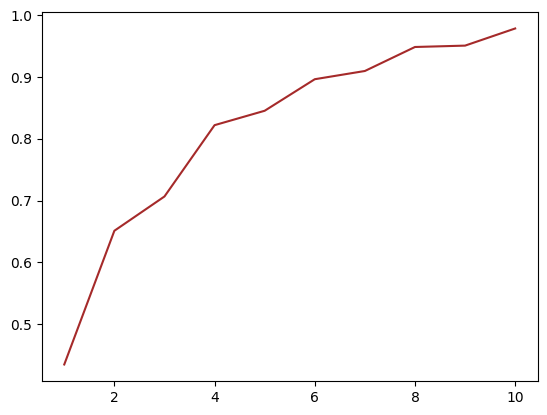

In [41]:
plt.plot(epoch,training_history.history['accuracy'],color='brown',label='Training Accuracy')

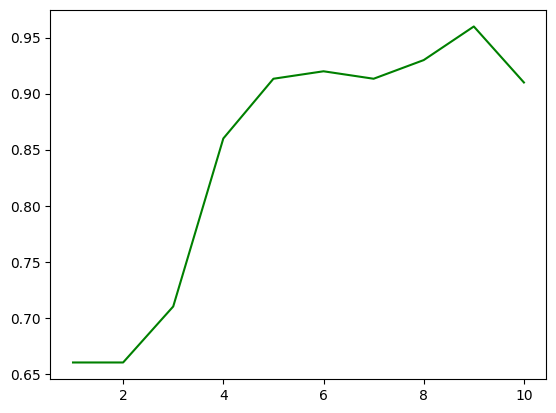

In [42]:
plt.plot(epoch,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
